In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('full_dataframe.csv', compression='zip')

In [4]:
df.head()

,Unnamed: 0,datetime,humidity,temperature,pressure,wind direction,wind speed,Latitude,Longitude,city_Albuquerque,...,w_desc_thunderstorm,w_desc_thunderstorm with drizzle,w_desc_thunderstorm with heavy drizzle,w_desc_thunderstorm with heavy rain,w_desc_thunderstorm with light drizzle,w_desc_thunderstorm with light rain,w_desc_thunderstorm with rain,w_desc_tornado,w_desc_very heavy rain,w_desc_volcanic ash
0,0,2012-10-02 09:00:00,87.0,284.590217,807.0,268.0,0.0,49.24966,-123.119339,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2012-10-02 10:00:00,88.0,284.588174,849.0,281.0,0.0,49.24966,-123.119339,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2012-10-02 11:00:00,89.0,284.586130,890.0,295.0,0.0,49.24966,-123.119339,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2012-10-02 12:00:00,89.0,284.584087,932.0,309.0,0.0,49.24966,-123.119339,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2012-10-02 13:00:00,90.0,284.582043,973.0,323.0,0.0,49.24966,-123.119339,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
temp = df[['datetime', 'temperature']].copy()
temp['datetime'] = pd.to_datetime(temp['datetime'])
temp = temp.set_index('datetime')

/Users/dnorris/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/dnorris/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.temperature   No. Observations:                  999
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1376.056
Method:                       css-mle   S.D. of innovations              0.959
Date:                Tue, 07 Apr 2020   AIC                           2762.112
Time:                        13:17:51   BIC                           2786.646
Sample:                             1   HQIC                          2771.437
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0096      0.008     -1.205      0.228      -0.025       0.006
ar.L1.D.temperature     0.8147      0.027     30.526      0.000       0.762       0.867
ma.L1.D.temperat

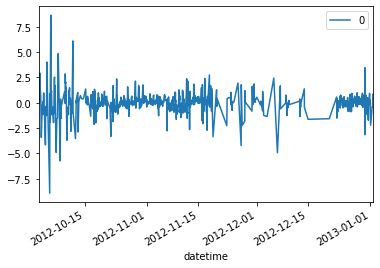

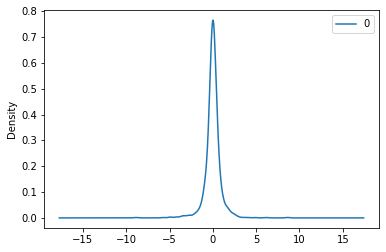

                0
count  999.000000
mean     0.001248
std      0.959982
min     -8.938574
25%     -0.282431
50%      0.015824
75%      0.328506
max      8.624504


In [6]:
from statsmodels.tsa.arima_model import ARIMA

model1 = ARIMA(temp[:1000], order=(1,1,2))
model1_fit = model1.fit()
print(model1_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model1_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())